In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [69]:
data_dir = "/homes/ukumaras/Projects/fast"

# twitter_base = pd.read_csv(f"{data_dir}/results_final/CkQST_KNN_NO_nq_final.csv")
# twitter_adopt = pd.read_csv(f"{data_dir}/results_final/AdoptCkQST_KNN_NO_nq_final.csv")
# twitter_fast = pd.read_csv(f"{data_dir}/results_final/FAST_KNN_NO_ObjIndex_nq_final.csv")

twitter_base = pd.read_csv(f"{data_dir}/output/CkQST_KNN_NO_twitter.csv")
twitter_adopt = pd.read_csv(f"{data_dir}/output/AdoptCkQST_KNN_NO_twitter.csv")
twitter_fast = pd.read_csv(f"{data_dir}/output/FAST_KNN_NO_ObjIndex_twitter.csv")

df_raw = pd.concat([twitter_base, twitter_adopt, twitter_fast])
df_raw = pd.DataFrame(df_raw[df_raw.num_objects == 100000])
df = pd.DataFrame(df_raw).groupby(['name', 'num_queries']).mean().reset_index()
df['index'] = df['name'].apply(lambda x: x.split("_")[0])

df['avg_search_time'] = (df['search_time'].astype(float) / (df['num_queries'] * 1000000)).astype(float)

df['num_queries'] = (df['num_queries'] / 1000000).astype(int)

df['creation_time'] = (df['creation_time'] / 1000000000).astype(int)
df['search_time'] = (df['search_time'] / 1000000).astype(int)

df = df.drop(columns=['clean_time', 'create_query_keymap_mem', 'search_query_struct_mem', 'search_query_keymap_mem', 'knn_deg_ratio', 'knn_ar_thresh', 'create_query_struct_mem'])
df

,name,num_queries,creation_time,search_time,num_objects,k,create_object_mem,create_query_mem,create_query_idx_mem,create_object_idx_mem,search_object_mem,search_query_mem,search_query_idx_mem,search_object_idx_mem,index,avg_search_time
0,AdoptCkQST_KNN_NO_twitter,1,780,155060,100000.0,5.0,52714742.4,5.102888e+08,5.984057e+08,137448590.4,52714742.4,5.102888e+08,5.984057e+08,272812246.4,AdoptCkQST,0.155060
1,AdoptCkQST_KNN_NO_twitter,2,1257,191914,100000.0,5.0,52695264.0,1.022753e+09,1.197137e+09,138120288.0,52695264.0,1.022753e+09,1.197137e+09,274383696.0,AdoptCkQST,0.095957
2,AdoptCkQST_KNN_NO_twitter,5,2485,297637,100000.0,5.0,52722440.0,2.553182e+09,2.989669e+09,138162561.6,52722440.0,2.553182e+09,2.989669e+09,276739160.0,AdoptCkQST,0.059528
3,AdoptCkQST_KNN_NO_twitter,10,4416,511294,100000.0,5.0,52734355.2,5.120365e+09,5.962788e+09,138111436.8,52734355.2,5.120365e+09,5.962788e+09,277943584.0,AdoptCkQST,0.051129
4,AdoptCkQST_KNN_NO_twitter,15,6912,685393,100000.0,5.0,52759704.0,7.685028e+09,8.940843e+09,138037840.0,52759704.0,7.685028e+09,8.940843e+09,278209800.0,AdoptCkQST,0.045693
5,AdoptCkQST_KNN_NO_twitter,20,8564,898193,100000.0,5.0,52780288.0,1.019243e+10,1.190172e+10,138273568.0,52780288.0,1.019243e+10,1.190172e+10,277886440.0,AdoptCkQST,0.044910
6,CkQST_KNN_NO_twitter,1,794,2658,100000.0,5.0,48714742.4,4.142888e+08,1.061359e+09,133448590.4,48714742.4,4.385951e+08,1.085665e+09,253964284.8,CkQST,0.002659
7,CkQST_KNN_NO_twitter,2,1302,4578,100000.0,5.0,48695264.0,8.307526e+08,2.050427e+09,134120288.0,48695264.0,8.722923e+08,2.091967e+09,254844448.0,CkQST,0.002289
8,CkQST_KNN_NO_twitter,5,2538,5670,100000.0,5.0,48722440.0,2.073182e+09,4.883200e+09,134162561.6,48722440.0,2.158635e+09,4.968654e+09,256325220.8,CkQST,0.001134
9,CkQST_KNN_NO_twitter,10,4499,8918,100000.0,5.0,48734355.2,4.160365e+09,9.356670e+09,134111436.8,48734355.2,4.319979e+09,9.516284e+09,256962406.4,CkQST,0.000892


In [70]:
dft = df_raw.copy(True).reset_index()
dft['num_q+name'] = dft['num_queries'].astype(str) + "_" + dft['index'].astype(str)

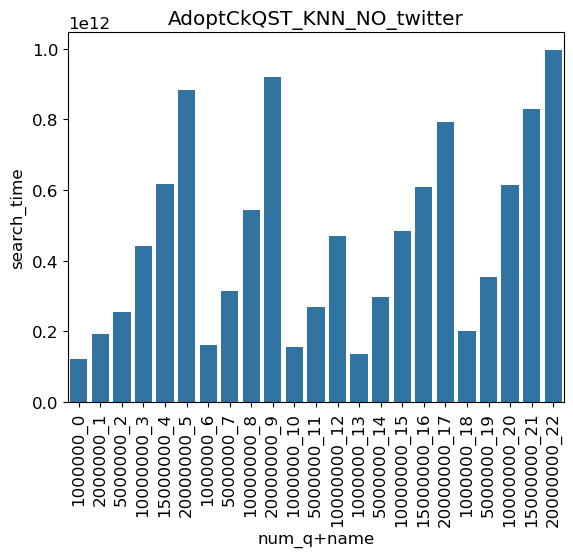

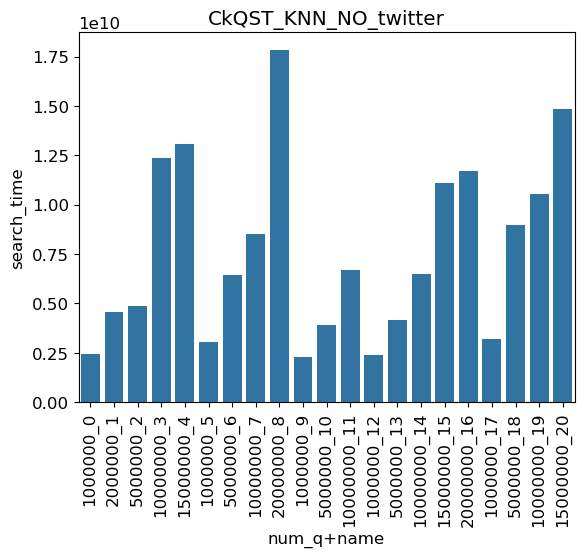

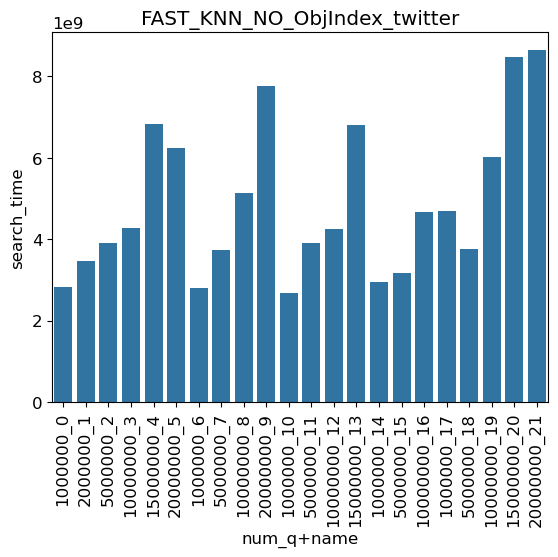

In [71]:
for n, g in dft.groupby("name"):
    sns.barplot(x='num_q+name', y='search_time', data=g)
    plt.xticks(rotation=90)
    plt.title(n)
    plt.show()

In [72]:
# for n, g in dft.groupby("name"):
#     sns.barplot(x='num_q+name', y='creation_time', data=g)
#     plt.xticks(rotation=90)
#     plt.title(n)
#     plt.show()

### Create

In [73]:
create = pd.DataFrame(df.loc[:, ['index', 'num_queries', 'creation_time']])
print("in seconds (s)")
create

in seconds (s)


,index,num_queries,creation_time
0,AdoptCkQST,1,780
1,AdoptCkQST,2,1257
2,AdoptCkQST,5,2485
3,AdoptCkQST,10,4416
4,AdoptCkQST,15,6912
5,AdoptCkQST,20,8564
6,CkQST,1,794
7,CkQST,2,1302
8,CkQST,5,2538
9,CkQST,10,4499


In [74]:
out = create.pivot(index='num_queries', columns='index', values='creation_time').reset_index()
out.to_csv('out_numq_create.dat', header=False, index=False, sep='\t')

### Search

In [75]:
search = pd.DataFrame(df.loc[:, ['index', 'num_queries', 'search_time']])
print("in milli-seconds (ms)")
search

in milli-seconds (ms)


,index,num_queries,search_time
0,AdoptCkQST,1,155060
1,AdoptCkQST,2,191914
2,AdoptCkQST,5,297637
3,AdoptCkQST,10,511294
4,AdoptCkQST,15,685393
5,AdoptCkQST,20,898193
6,CkQST,1,2658
7,CkQST,2,4578
8,CkQST,5,5670
9,CkQST,10,8918


In [76]:
out = search.pivot(index='num_queries', columns='index', values='search_time').reset_index()
out.to_csv('out_numq_search.dat', header=False, index=False, sep='\t')

In [77]:
avg_search = pd.DataFrame(df.loc[:, ['index', 'num_queries', 'avg_search_time']])
print("avg. in milli-seconds (ms)")
avg_search

avg. in milli-seconds (ms)


,index,num_queries,avg_search_time
0,AdoptCkQST,1,0.155060
1,AdoptCkQST,2,0.095957
2,AdoptCkQST,5,0.059528
3,AdoptCkQST,10,0.051129
4,AdoptCkQST,15,0.045693
5,AdoptCkQST,20,0.044910
6,CkQST,1,0.002659
7,CkQST,2,0.002289
8,CkQST,5,0.001134
9,CkQST,10,0.000892


In [78]:
out = avg_search.pivot(index='num_queries', columns='index', values='avg_search_time').reset_index()
out.to_csv('out_numq_avg_search.dat', header=False, index=False, sep='\t')

## Memory

In [79]:
mem = pd.DataFrame(df.loc[:, ['index', 'num_queries', 'search_query_idx_mem', 'search_query_mem']])
mem['memory'] = (mem['search_query_idx_mem'] - mem['search_query_mem']) / (1024 * 1024)
mem = mem.drop(columns=['search_query_idx_mem', 'search_query_mem'])
mem

,index,num_queries,memory
0,AdoptCkQST,1,84.034782
1,AdoptCkQST,2,166.305534
2,AdoptCkQST,5,416.267097
3,AdoptCkQST,10,803.397014
4,AdoptCkQST,15,1197.638474
5,AdoptCkQST,20,1630.100502
6,CkQST,1,617.093896
7,CkQST,2,1163.172478
8,CkQST,5,2679.842816
9,CkQST,10,4955.582657


In [80]:
out = mem.pivot(index='num_queries', columns='index', values='memory').reset_index()
out.to_csv('out_numq_mem_1.dat', header=False, index=False, sep='\t')